**The Spark Foundation - GRIPJULY2022 - Data Science & Business Analytics** 


 Task-2 - Prediction using Unsupervised ML - Thriguna


In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sse = []  # sum squared error

In [ ]:
# Using kMeans Clustering

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [ ]:
kmeans.fit(x)

KMeans(n_clusters=10, random_state=0)

In [ ]:
# The lowest SSE value
kmeans.inertia_

26.09432474054042

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.5125    , 4.        , 1.475     , 0.275     ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [4.67894737, 3.08421053, 1.37894737, 0.2       ],
       [5.1       , 3.51304348, 1.52608696, 0.27391304],
       [5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [7.43333333, 2.92222222, 6.26666667, 1.98888889],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895],
       [7.6       , 3.73333333, 6.4       , 2.23333333]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

6

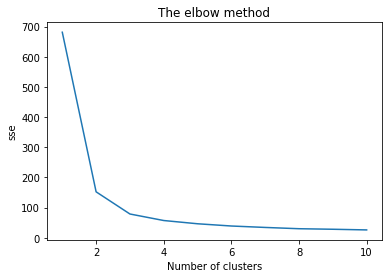

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse') 
plt.show()

In [ ]:
# identifying elbow point
from kneed import KneeLocator
kl=KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing" )

kl.elbow

3

In [ ]:
# predicting
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

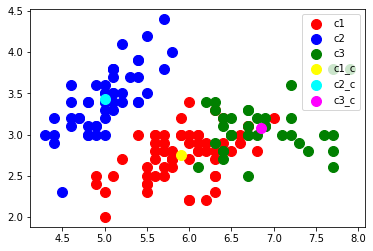

In [ ]:
# Visualising the clusters - On 0, 1 indexed columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'c1')  # cluster-1
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'c2')  # cluster-2
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'c3')  # cluster-3

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], s = 100, c = 'yellow', label = 'c1_c') # cluster1-centroid
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], s = 100, c = 'cyan', label = 'c2_c')  # cluster2-centroid
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2,1], s = 100, c = 'magenta', label = 'c3_c')  #cluster3-centroid
plt.legend()

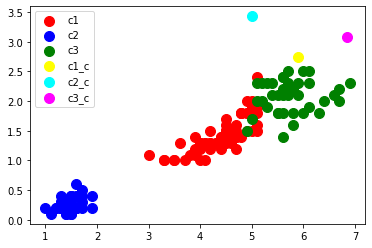

In [ ]:
# Visualising the clusters - On 2, 3 indexed columns
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'c1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'c2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'c3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0,1], s = 100, c = 'yellow', label = 'c1_c')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1,1], s = 100, c = 'cyan', label = 'c2_c')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2,1], s = 100, c = 'magenta', label = 'c3_c')
plt.legend()

To sum it up, we can able to find the optimum no.of clusters and visualize cluster classification 